In [36]:
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('canada-capita-income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


Scatter plot of Canada per capita income

<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

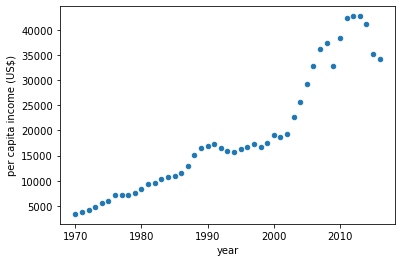

In [38]:
df.plot(x="year",y="per capita income (US$)", kind="scatter")

In [39]:
dep_var = df["per capita income (US$)"]
exp_var = df["year"]
exp_var

0     1970
1     1971
2     1972
3     1973
4     1974
5     1975
6     1976
7     1977
8     1978
9     1979
10    1980
11    1981
12    1982
13    1983
14    1984
15    1985
16    1986
17    1987
18    1988
19    1989
20    1990
21    1991
22    1992
23    1993
24    1994
25    1995
26    1996
27    1997
28    1998
29    1999
30    2000
31    2001
32    2002
33    2003
34    2004
35    2005
36    2006
37    2007
38    2008
39    2009
40    2010
41    2011
42    2012
43    2013
44    2014
45    2015
46    2016
Name: year, dtype: int64

In [40]:
exp_var = sm.add_constant(exp_var)
exp_var

,const,year
0,1.0,1970
1,1.0,1971
2,1.0,1972
3,1.0,1973
4,1.0,1974
5,1.0,1975
6,1.0,1976
7,1.0,1977
8,1.0,1978
9,1.0,1979


Fitting the linear regression model

In [49]:
model = sm.OLS(dep_var,exp_var)
result = model.fit()  

Viewing the model summary

In [50]:
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     per capita income (US$)   R-squared:                       0.891
Model:                                 OLS   Adj. R-squared:                  0.888
Method:                      Least Squares   F-statistic:                     367.5
Date:                     Thu, 09 Jun 2022   Prob (F-statistic):           2.80e-23
Time:                             11:30:57   Log-Likelihood:                -455.71
No. Observations:                       47   AIC:                             915.4
Df Residuals:                           45   BIC:                             919.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Line of best fit: y = -1.632e+06 + 828.4651x

In [51]:
#Predicting the per capita income of Canada in the year 2020
year = 2020
predic = result.predict([1,year])
print(f"Predicted Canada's per capita income (year {year}): ${predic}")
# prediction = $41288.69

Predicted Canada's per capita income (year 2020): $[41288.69409442]


Drawing the line of best fit (regression line)

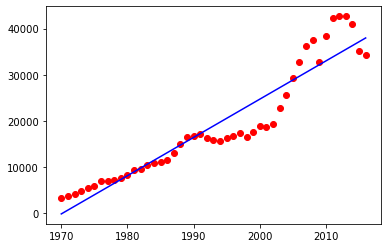

In [43]:
pred_plot = plt.figure()
pred_plot = plt.plot(df["year"],df["per capita income (US$)"],'ro',label="data")
pred_plot = plt.plot(df["year"],result.fittedvalues,'b-',label="regression line")

In [52]:
from sklearn import linear_model

In [53]:
_year = df.drop('per capita income (US$)',axis='columns')
_year

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [ ]:
pci = df.per_capita_income_(US$)